In [ ]:

import pandas as pd

### Создание DataFrame из файла CSV ###

In [ ]:
wine_dataset = pd.read_csv('datasets/wine-quality.csv')
wine_dataset.info()

### Создание DataFrame из файла Excel ###

In [ ]:
wine_dataset = pd.read_excel('datasets/wine-quality.xlsx', sheet_name='Sheet1')
# Важно:
# если ImportError: отсутствует дополнительная зависимость 'openpyxl'.  Используйте pip или Conda для установки openpyxl.
wine_dataset_excel = pd.DataFrame.from_dict(wine_dataset)
wine_dataset_excel.info()

In [ ]:
wine_dataset_excel.head(2)

### Описание Dataframe ###

In [ ]:
wine_dataset_excel.describe()

### Описание методов .describe() ###
* DataFrame.count: Подсчитывает количество ненулевых (non-NA/null) наблюдений.
* DataFrame.max: Максимум значений в объекте.
* DataFrame.min: Минимум значений в объекте.
* DataFrame.mean: Среднее значение.
* DataFrame.std: Стандартное отклонение наблюдений.
* DataFrame.25: Нижний перцентиль — 75% данных находятся выше этого значения.
* DataFrame.75: Верхний перцентиль — 25% данных находятся выше этого значения.
* DataFrame.50: 50-й перцентиль совпадает с медианой.

### Dataframe Correlation Matrix ###
Вычислите попарную корреляцию столбцов, исключая значения NA / null. Сгенерируйте значения от -1 до 1, чтобы представить отрицательную или положительную корреляцию между двумя значениями.:

In [ ]:
wine_dataset_excel.corr()

### Dataframes Columns ###
#### Value Counts for Categorical Values ####
##### Count the number of entries in a categorical column for each categroy: #####

In [ ]:
wine_dataset_excel['quality'].value_counts()
# есть 5 вин с качеством 9 и 2198 с качеством 6

In [ ]:
wine_dataset_excel['quality'].value_counts(normalize=True).plot.bar()

#### Уникальные записи в столбце ####

In [ ]:
print(wine_dataset_excel['quality'].unique())
# array([6, 5, 7, 8, 4, 3, 9])
# вин с качеством 1, 2 и 10 в списке нет

In [ ]:
print(wine_dataset_excel['quality'].nunique())
# 7
# содержится 7 классов качества в 'quality'

### Выбор столбцов ###

In [ ]:
# Select a column to return a PandaSeries
type(wine_dataset_excel['pH'])  #
wine_dataset_excel['pH']

In [ ]:
# select only wines with a pH of 2.72
wine_dataset_excel[wine_dataset_excel['pH'] == 2.72]

In [ ]:
# select multiple columns
columns = ['pH', 'alcohol']
type(wine_dataset_excel[columns])
wine_dataset_excel[columns]

In [ ]:
plot = wine_dataset_excel[columns].plot.scatter(
        figsize=(12, 8),
        x='pH',
        y='alcohol'
        )

### Переименование категориальных значений / Renaming Categorical Values ###

In [ ]:
wine_dataset_excel['quality'] = wine_dataset_excel['quality'].replace(
    [10,9,8,7,6,5,4,3,2,1],
    ['A','B','C','D','E','F','G','H','I','J']
)

wine_dataset_excel['quality']

### Отображение значений / Value Mapping ###

In [ ]:
feature_map = {
    'A':10,
    'B': 9,
    'C': 8,
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

wine_dataset_excel['quality'] = wine_dataset_excel['quality'].map(feature_map)
wine_dataset_excel['quality']

### Сортировка по столбцам / Sorting by Columns ###

In [ ]:
wine_dataset_excel.sort_values(by='quality', ascending=False, na_position='last')

In [ ]:
wine_dataset_excel.sort_values(by=['alcohol', 'residual sugar'], ascending=False, na_position='first')

### Нахождение индекса максимального/минимального значения в столбце ###


In [ ]:
# максимальное значение в столбце
wine_dataset_excel['total sulfur dioxide'].max()
# 440.0

In [ ]:
# определяет положение максимального значения в столбце (ячейка)
max_value_location = wine_dataset_excel['total sulfur dioxide'].idxmax()
print(max_value_location)
# 4745
wine_dataset_excel.iloc[max_value_location]

In [ ]:
# минимальное значение в столбце
min_value_location = wine_dataset_excel['total sulfur dioxide'].idxmin()
print(min_value_location)
# 3710
wine_dataset_excel.iloc[min_value_location]

### Добавление столбцов ###

In [ ]:
wine_dataset_excel['total acidity'] = wine_dataset_excel['fixed acidity'] + wine_dataset_excel['volatile acidity']
wine_dataset_excel

### Удаление столбцов ###

In [ ]:
wine_dataset_excel_dropped = wine_dataset_excel.drop(['total acidity'], axis=1)
wine_dataset_excel_dropped

## Строки фреймов данных /  Dataframes Rows ##

### Настройка индексного столбца / Setting an Index Column ###

In [ ]:
# Добавление индексного столбца
wine_dataset_excel_dropped['index'] = range(1, len(wine_dataset_excel_dropped) + 1)
wine_dataset_excel_dropped.head(2)

In [ ]:
wine_dataset_excel_indexed = wine_dataset_excel_dropped.set_index('index')
wine_dataset_excel_indexed.head(2)

In [ ]:
# Сброс индекса снова превращает индекс в обычный столбец
wine_dataset_excel_indexed.reset_index()

### Выбор строк ###

In [ ]:
# select first rows by integer location
wine_dataset_excel_indexed.iloc[0]

In [ ]:
# Выберите несколько строк через срез
wine_dataset_excel_indexed.iloc[:3]

In [ ]:
# Выберите несколько строк прямым указанием на строки
wine_dataset_excel_indexed.loc[[111,222,333]]

### Удаление строк ###


In [ ]:
wine_dataset_excel_indexed.drop(1, axis=0)

### Вставка строк ###

In [ ]:
# copy a row
row_copy = wine_dataset_excel_indexed.iloc[0]
row_copy

In [ ]:
# wine_dataset_excel_indexed.append(row_copy)
# FutureWarning: The frame.append method is deprecated and will be removed
# from pandas in a future version. Use pandas.concat instead.
wine_dataset_excel_indexed = pd.concat([wine_dataset_excel_indexed, row_copy], ignore_index=True)

In [ ]:
wine_dataset_excel_indexed

In [ ]:
pd.concat([wine_dataset_excel_indexed, row_copy.to_frame().T], ignore_index=False)

### Удаление дублирующихся строк ###

In [ ]:
# test for duplicated rows
wine_dataset_excel.duplicated()
# 4 - я строка содержит дублирующуюся запись:

In [ ]:
# remove duplicates
wine_dataset_excel_deduped = wine_dataset_excel.drop_duplicates()
wine_dataset_excel_deduped.shape
# (3961, 12)
# We are down from 4898 to 3961 dropping 937 rows!

### Выбор n-наибольшего / n-наименьшего значения ###

In [ ]:
top_10_wines = wine_dataset_excel.nlargest(10, 'quality')
top_10_wines

In [ ]:
worst_10_wines = wine_dataset_excel.nsmallest(10, 'quality')
worst_10_wines

### Выбор случайной выборки ###

In [115]:
# sample a fixed number - 2
two_random_wines = wine_dataset_excel.sample(n=2)
two_random_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
3820,6.3,0.30,0.20,3.7,0.039,34.0,132.0,0.99158,3.00,0.38,10.7,5,6.60
629,5.8,0.31,0.33,1.2,0.036,23.0,99.0,0.99160,3.18,0.60,10.5,6,6.11


In [116]:
# sample a percentage - 0.1%
random_wines_01_percent = wine_dataset_excel.sample(frac=0.001)
random_wines_01_percent

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
2794,6.8,0.35,0.53,10.1,0.053,37.0,151.0,0.99630,3.07,0.40,9.4,5,7.15
1264,7.2,0.14,0.35,1.2,0.036,15.0,73.0,0.99380,3.46,0.39,9.9,5,7.34
4246,5.7,0.18,0.26,2.2,0.023,21.0,95.0,0.98930,3.07,0.54,12.3,6,5.88
4371,7.0,0.23,0.28,2.7,0.053,16.0,92.0,0.99372,3.18,0.56,9.3,5,7.23
2020,7.7,0.26,0.34,6.4,0.050,36.0,163.0,0.99370,3.19,0.70,11.5,6,7.96


<Axes: >

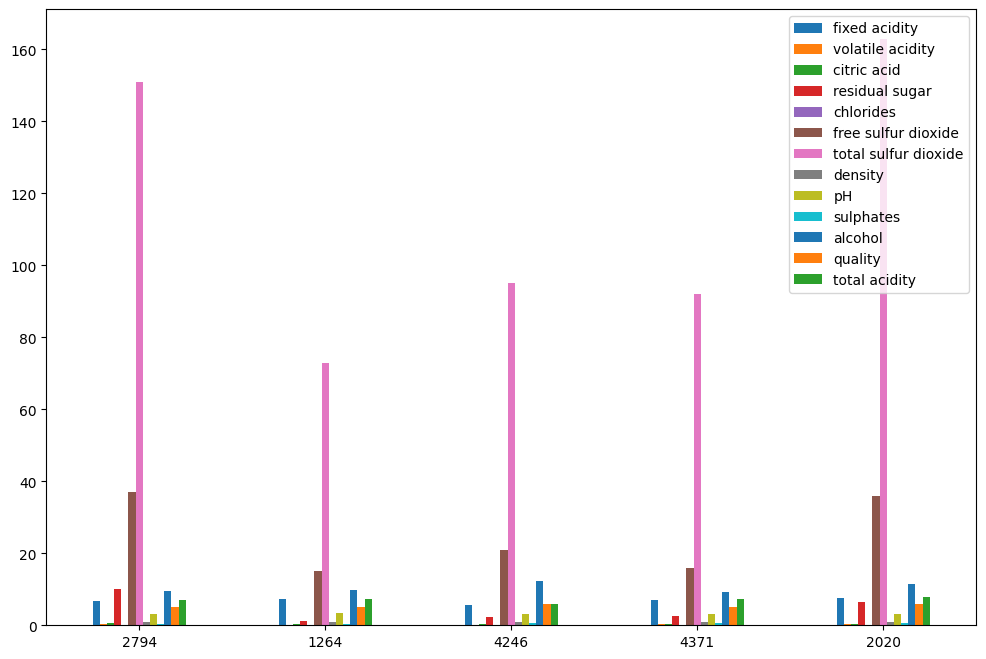

In [117]:
random_wines_01_percent.plot.bar(figsize=(12,8), rot=0)

### Перемешать набор данных ###

In [118]:
# Use the randomizer in sample() to shuffle the entire dataset
random_wines_shuffle = wine_dataset_excel.sample(frac=1)
random_wines_shuffle

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
1414,5.8,0.17,0.30,1.4,0.037,55.0,130.0,0.99090,3.29,0.38,11.3,6,5.97
4335,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,7.49
1168,7.2,0.20,0.38,1.0,0.037,21.0,74.0,0.99180,3.21,0.37,11.0,5,7.40
508,5.9,0.62,0.28,3.5,0.039,55.0,152.0,0.99070,3.44,0.44,12.0,6,6.52
4409,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,7,6.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,8.1,0.24,0.38,4.3,0.044,49.0,172.0,0.99600,3.37,0.74,10.8,6,8.34
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.5,5,6.98
3480,6.5,0.30,0.27,4.0,0.038,37.0,97.0,0.99026,3.20,0.60,12.6,8,6.80
3780,6.7,0.42,0.39,12.1,0.040,61.0,248.0,0.99794,3.31,0.58,9.7,5,7.12


### Условная фильтрация ###

In [121]:
# Отметьте в столбце 'really sour' все вина с pH ниже 3. Да или Нет.
wine_dataset_excel_indexed['really sour'] = wine_dataset_excel_indexed['pH'] < 3.
wine_dataset_excel_indexed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0,really sour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,NaN,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,NaN,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,NaN,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,NaN,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,NaN,False


### Фильтровать по значению ###

In [122]:
# Выберите только строки со значением pH ниже 3
sour_wines = wine_dataset_excel_indexed[wine_dataset_excel_indexed['pH'] < 3.]
print(sour_wines.shape)
# there are 437 sour wines - (437, 13)
sour_wines.head(5)

(437, 14)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0,really sour
10,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5.0,NaN,True
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5.0,NaN,True
73,8.6,0.230,0.46,1.00,0.054,9.0,72.0,0.9941,2.95,0.49,9.1,6.0,NaN,True
78,7.4,0.180,0.30,8.80,0.064,26.0,103.0,0.9961,2.94,0.56,9.3,5.0,NaN,True
97,8.6,0.265,0.36,1.20,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7.0,NaN,True


In [124]:
# select only rows that are marked as not sour
not_so_sour_wines = wine_dataset_excel_indexed[wine_dataset_excel_indexed['really sour'] == False]
print(not_so_sour_wines.shape)
# there are 4497 not so sour wines - (4497, 14)
not_so_sour_wines.head(5)

(4497, 14)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0,really sour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,NaN,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,NaN,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,NaN,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,NaN,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,NaN,False
